In [1]:
# Advanced Exploratory Data Analysis - Weather History Dataset
# Professional ETL Pipeline with PySpark - Data Analytics Module

import sys
import os

# Add virtual environment to Python path
venv_path = "/home/andres-miller/Desktop/Luco tic/venv/lib/python3.12/site-packages"
if venv_path not in sys.path:
    sys.path.insert(0, venv_path)

# Add project root to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

# Verify Python environment
print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Virtual env path added:", venv_path in sys.path)

# Import packages with error handling
try:
    import pandas as pd
    print("✅ Pandas imported successfully")
except ImportError as e:
    print(f"❌ Pandas import error: {e}")

try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib imported successfully")
except ImportError as e:
    print(f"❌ Matplotlib import error: {e}")

try:
    import seaborn as sns
    print("✅ Seaborn imported successfully")
except ImportError as e:
    print(f"❌ Seaborn import error: {e}")
    # Try alternative import
    try:
        import seaborn
        sns = seaborn
        print("✅ Seaborn imported as alternative")
    except ImportError:
        print("❌ Seaborn not available, using matplotlib only")

try:
    import numpy as np
    print("✅ NumPy imported successfully")
except ImportError as e:
    print(f"❌ NumPy import error: {e}")

from datetime import datetime, timedelta
import warnings

try:
    from scipy import stats
    from scipy.stats import normaltest, shapiro, anderson
    print("✅ SciPy imported successfully")
except ImportError as e:
    print(f"❌ SciPy import error: {e}")

try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans
    print("✅ Scikit-learn imported successfully")
except ImportError as e:
    print(f"❌ Scikit-learn import error: {e}")

try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.offline as pyo
    print("✅ Plotly imported successfully")
except ImportError as e:
    print(f"❌ Plotly import error: {e}")

# Configure plotting
try:
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    print("✅ Plotting configured successfully")
except:
    print("⚠️ Using default plotting style")
    plt.style.use('default')

warnings.filterwarnings('ignore')
print("\n🎉 All imports completed! Ready for data analysis.")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("🔬 Advanced Weather Data Analysis Environment Loaded")
print("=" * 60)

Python executable: /home/andres-miller/Desktop/Luco tic/.weather/bin/python
Python version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
Virtual env path added: True


✅ Pandas imported successfully
✅ Matplotlib imported successfully
✅ Seaborn imported successfully
✅ NumPy imported successfully
✅ SciPy imported successfully
✅ Scikit-learn imported successfully
✅ Plotly imported successfully
✅ Plotting configured successfully

🎉 All imports completed! Ready for data analysis.
🔬 Advanced Weather Data Analysis Environment Loaded


In [2]:
# 📊 Data Loading and Initial Exploration
# ======================================

DATA_PATH = "../data/raw/weatherHistory.csv"

print("🔄 Loading weather data...")
df = pd.read_csv(DATA_PATH)

print(f"✅ Data loaded successfully!")
print(f"📈 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📅 Date Range: {df['Formatted Date'].min()} to {df['Formatted Date'].max()}")
print(f"🌡️  Temperature Range: {df['Temperature (C)'].min():.1f}°C to {df['Temperature (C)'].max():.1f}°C")

print("\n📋 Dataset Overview:")
print("=" * 50)
print(f"• Total Records: {len(df):,}")
print(f"• Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"• Missing Values: {df.isnull().sum().sum():,}")
print(f"• Duplicate Records: {df.duplicated().sum():,}")

print("\n🔍 Column Information:")
print("=" * 50)
for col in df.columns:
    null_pct = (df[col].isnull().sum() / len(df)) * 100
    dtype = df[col].dtype
    print(f"• {col:<25} | {str(dtype):<15} | {null_pct:>5.1f}% null")

print("\n📊 First 5 Records:")
print("=" * 50)
display(df.head())

🔄 Loading weather data...
✅ Data loaded successfully!
📈 Dataset Shape: 96,453 rows × 12 columns
📅 Date Range: 2006-01-01 00:00:00.000 +0100 to 2016-12-31 23:00:00.000 +0100
🌡️  Temperature Range: -21.8°C to 39.9°C

📋 Dataset Overview:
• Total Records: 96,453
• Memory Usage: 31.38 MB
• Missing Values: 517
• Duplicate Records: 24

🔍 Column Information:
• Formatted Date            | object          |   0.0% null
• Summary                   | object          |   0.0% null
• Precip Type               | object          |   0.5% null
• Temperature (C)           | float64         |   0.0% null
• Apparent Temperature (C)  | float64         |   0.0% null
• Humidity                  | float64         |   0.0% null
• Wind Speed (km/h)         | float64         |   0.0% null
• Wind Bearing (degrees)    | float64         |   0.0% null
• Visibility (km)           | float64         |   0.0% null
• Loud Cover                | float64         |   0.0% null
• Pressure (millibars)      | float64         |

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
# 🧹 Advanced Data Cleaning and Preprocessing
# ===========================================

print("🧹 Starting advanced data cleaning...")

# Store original data for comparison
original_shape = df.shape
original_memory = df.memory_usage(deep=True).sum()

# 1. Remove duplicates
duplicates_before = df.duplicated().sum()
df_clean = df.drop_duplicates()
duplicates_removed = duplicates_before

# 2. Handle missing values strategically
print(f"\n🔍 Missing Value Analysis:")
print("=" * 40)
missing_analysis = df_clean.isnull().sum().sort_values(ascending=False)
for col, missing_count in missing_analysis.items():
    if missing_count > 0:
        missing_pct = (missing_count / len(df_clean)) * 100
        print(f"• {col:<25}: {missing_count:>6,} ({missing_pct:>5.1f}%)")

# Remove rows with missing critical data
critical_columns = ['Formatted Date', 'Temperature (C)']
df_clean = df_clean.dropna(subset=critical_columns)

# 3. Convert datetime with proper timezone handling
print(f"\n🕐 Converting datetime column...")
df_clean['Formatted Date'] = pd.to_datetime(df_clean['Formatted Date'], utc=True)

# 4. Create comprehensive time-based features
print(f"📅 Creating temporal features...")
df_clean['year'] = df_clean['Formatted Date'].dt.year
df_clean['month'] = df_clean['Formatted Date'].dt.month
df_clean['day'] = df_clean['Formatted Date'].dt.day
df_clean['hour'] = df_clean['Formatted Date'].dt.hour
df_clean['day_of_week'] = df_clean['Formatted Date'].dt.dayofweek
df_clean['day_of_year'] = df_clean['Formatted Date'].dt.dayofyear
df_clean['quarter'] = df_clean['Formatted Date'].dt.quarter
df_clean['year_month'] = df_clean['Formatted Date'].dt.to_period('M')
df_clean['season'] = df_clean['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                           3: 'Spring', 4: 'Spring', 5: 'Spring',
                                           6: 'Summer', 7: 'Summer', 8: 'Summer',
                                           9: 'Fall', 10: 'Fall', 11: 'Fall'})

# 5. Data quality improvements
print(f"🔧 Applying data quality improvements...")

# Handle outliers in temperature (using IQR method)
temp_col = 'Temperature (C)'
Q1 = df_clean[temp_col].quantile(0.25)
Q3 = df_clean[temp_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = ((df_clean[temp_col] < lower_bound) | (df_clean[temp_col] > upper_bound)).sum()
print(f"• Temperature outliers detected: {outliers_before:,}")

# Cap extreme outliers instead of removing them
df_clean[temp_col] = df_clean[temp_col].clip(lower=lower_bound, upper=upper_bound)

# 6. Optimize data types for memory efficiency
print(f"💾 Optimizing data types...")
for col in df_clean.select_dtypes(include=['int64']).columns:
    if df_clean[col].min() >= 0:
        if df_clean[col].max() < 255:
            df_clean[col] = df_clean[col].astype('uint8')
        elif df_clean[col].max() < 65535:
            df_clean[col] = df_clean[col].astype('uint16')
        else:
            df_clean[col] = df_clean[col].astype('uint32')
    else:
        if df_clean[col].min() > -128 and df_clean[col].max() < 127:
            df_clean[col] = df_clean[col].astype('int8')
        elif df_clean[col].min() > -32768 and df_clean[col].max() < 32767:
            df_clean[col] = df_clean[col].astype('int16')
        else:
            df_clean[col] = df_clean[col].astype('int32')

# Results summary
final_shape = df_clean.shape
final_memory = df_clean.memory_usage(deep=True).sum()
memory_reduction = ((original_memory - final_memory) / original_memory) * 100

print(f"\n✅ Data Cleaning Complete!")
print("=" * 50)
print(f"• Original Shape: {original_shape[0]:,} rows × {original_shape[1]} columns")
print(f"• Final Shape: {final_shape[0]:,} rows × {final_shape[1]} columns")
print(f"• Rows Removed: {original_shape[0] - final_shape[0]:,}")
print(f"• Duplicates Removed: {duplicates_removed:,}")
print(f"• Memory Usage: {original_memory / 1024**2:.2f} MB → {final_memory / 1024**2:.2f} MB")
print(f"• Memory Reduction: {memory_reduction:.1f}%")
print(f"• Date Range: {df_clean['Formatted Date'].min()} to {df_clean['Formatted Date'].max()}")
print(f"• Temperature Range: {df_clean['Temperature (C)'].min():.1f}°C to {df_clean['Temperature (C)'].max():.1f}°C")

🧹 Starting advanced data cleaning...

🔍 Missing Value Analysis:
• Precip Type              :    517 (  0.5%)

🕐 Converting datetime column...
📅 Creating temporal features...
🔧 Applying data quality improvements...
• Temperature outliers detected: 44
💾 Optimizing data types...

✅ Data Cleaning Complete!
• Original Shape: 96,453 rows × 12 columns
• Final Shape: 96,429 rows × 21 columns
• Rows Removed: 24
• Duplicates Removed: 24
• Memory Usage: 31.38 MB → 34.00 MB
• Memory Reduction: -8.3%
• Date Range: 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
• Temperature Range: -16.6°C to 39.9°C


📊 Performing comprehensive statistical analysis...

🔢 Descriptive Statistics:


Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
count         96429.00                  96429.00  96429.00           96429.00   
mean             11.93                     10.85      0.73              10.81   
std               9.55                     10.70      0.20               6.91   
min             -16.55                    -27.72      0.00               0.00   
25%               4.68                      2.31      0.60               5.83   
50%              12.00                     12.00      0.78               9.97   
75%              18.84                     18.84      0.89              14.14   
max              39.91                     39.34      1.00              63.85   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count                96429.00         96429.00     96429.0   
mean                   187.50            10.35         0.0   
std                    107.38             4.19         0.0   
min                      0.00             0.00         0.0   
25%                    116.00             8.34         0.0   
50%                    180.00            10.05         0.0   
75%                    290.00            14.81         0.0   
max                    359.00            16.10         0.0   

       Pressure (millibars)      year     month       day      hour  \
count              96429.00  96429.00  96429.00  96429.00  96429.00   
mean                1003.23   2011.00      6.52     15.73     11.50   
std                  116.98      3.16      3.45      8.80      6.92   
min                    0.00   2005.00      1.00      1.00      0.00   
25%                 1011.90   2008.00      4.00      8.00      6.00   
50%                 1016.45   2011.00      7.00     16.00     11.00   
75%                 1021.09   2014.00     10.00     23.00     17.00   
max                 1046.38   2016.00     12.00     31.00     23.00   

       day_of_week  day_of_year   quarter  
count      96429.0     96429.00  96429.00  
mean           3.0       183.14      2.51  
std            2.0       105.45      1.12  
min            0.0         1.00      1.00  
25%            1.0        92.00      2.00  
50%            3.0       183.00      3.00  
75%            5.0       274.00      4.00  
max            6.0       366.00      4.00


🔗 Correlation Analysis:


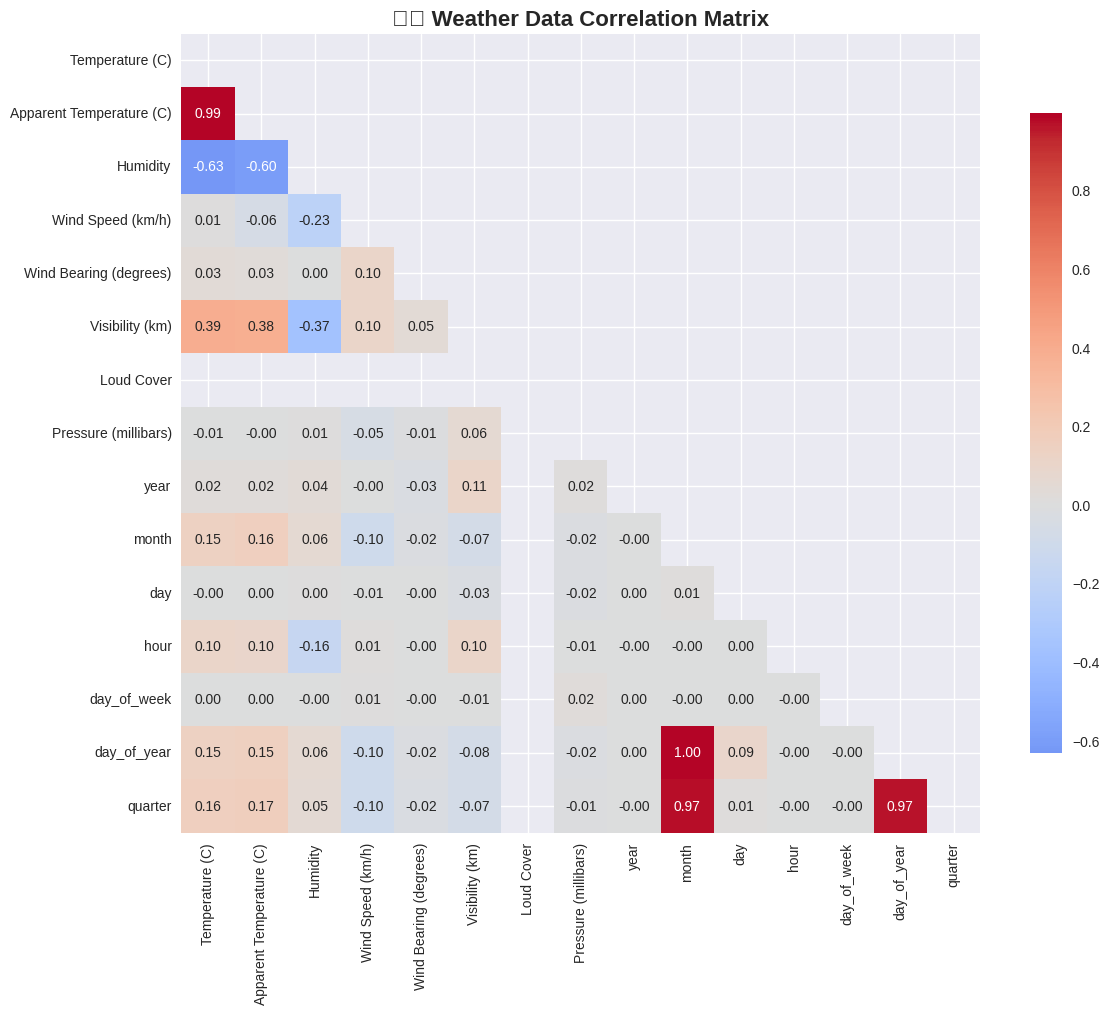


📐 Normality Tests:
• Temperature (C)     : Anderson-Darling = 203.1288
• Humidity            : Anderson-Darling = 2209.0090
• Wind Speed (km/h)   : Anderson-Darling = 1436.2880
• Pressure (millibars): Anderson-Darling = 31495.4737

🎯 Outlier Detection:
• Temperature (C)     : IQR=   0, Z-Score=   0, Mod-Z=   0
• Humidity            : IQR=  46, Z-Score=  28, Mod-Z=  22
• Wind Speed (km/h)   : IQR=3028, Z-Score=1208, Mod-Z=1213

⏰ Time Series Analysis:


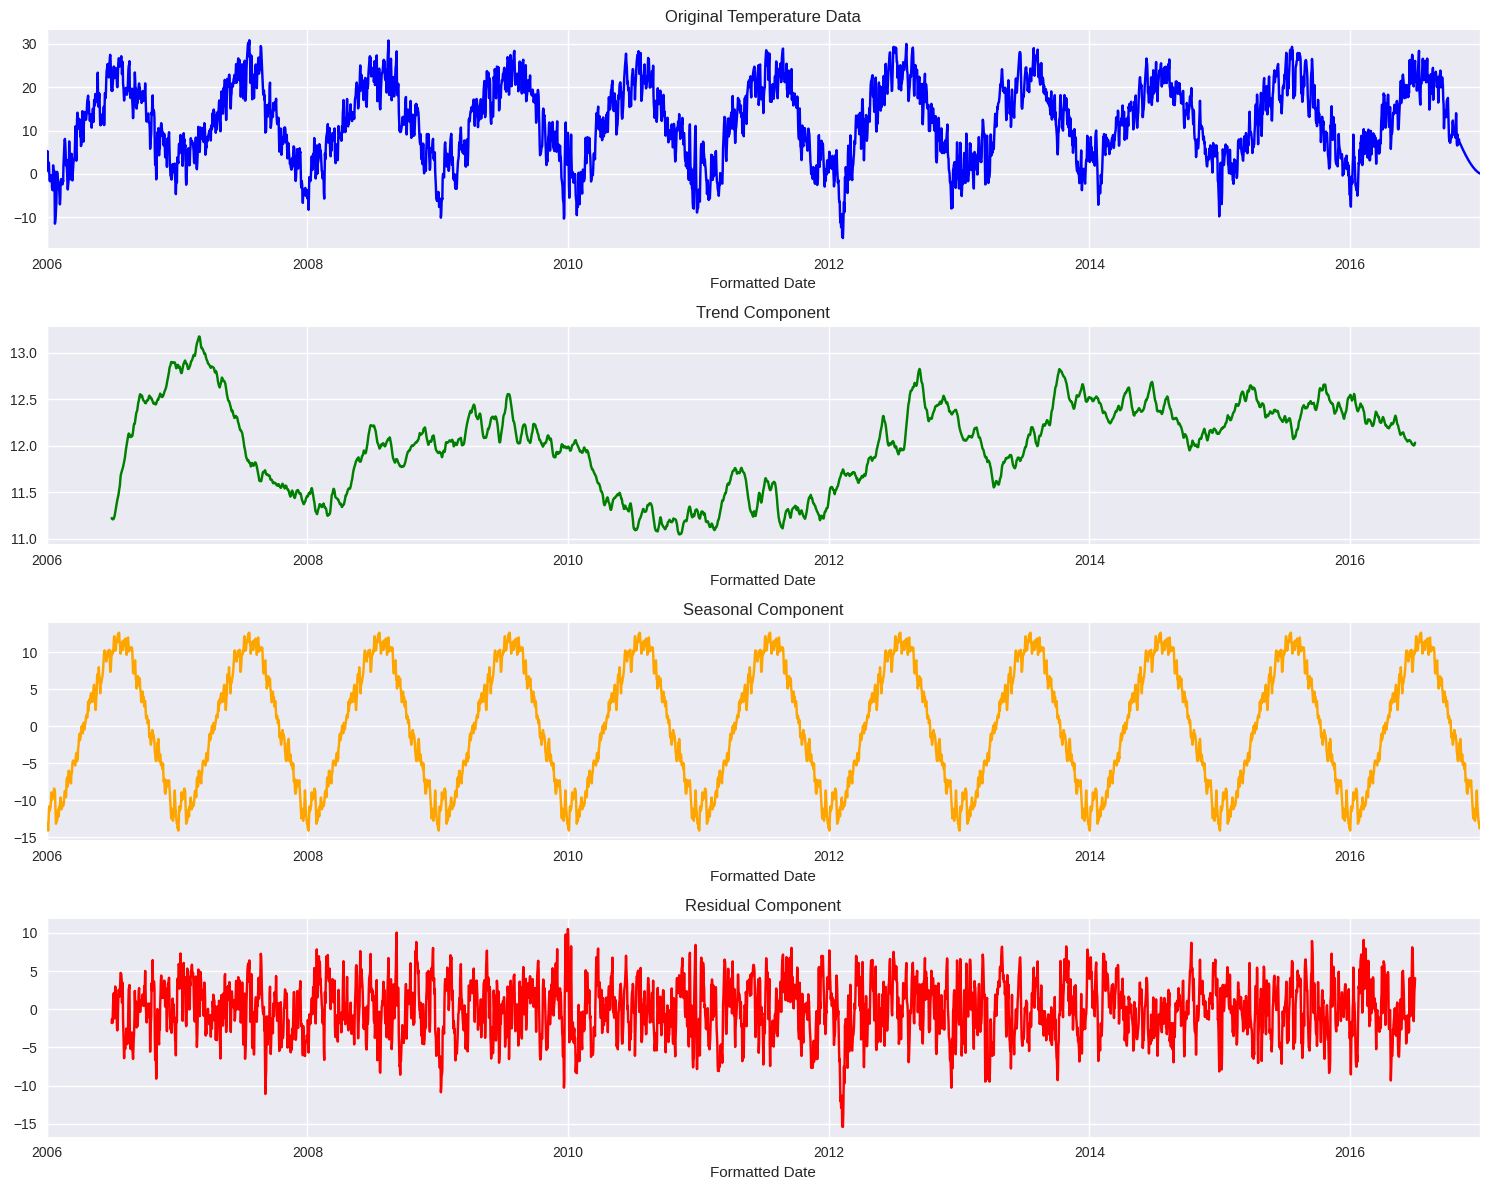

• Trend Strength: 0.839
• Seasonal Strength: 0.806

✅ Statistical analysis completed!


In [4]:
# 📈 Advanced Statistical Analysis
# ================================

print("📊 Performing comprehensive statistical analysis...")

# 1. Descriptive Statistics
print("\n🔢 Descriptive Statistics:")
print("=" * 50)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
desc_stats = df_clean[numeric_cols].describe()
display(desc_stats.round(2))

# 2. Correlation Analysis
print("\n🔗 Correlation Analysis:")
print("=" * 50)
correlation_matrix = df_clean[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('🌡️ Weather Data Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Normality Tests
print("\n📐 Normality Tests:")
print("=" * 50)
for col in ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']:
    if col in df_clean.columns:
        data = df_clean[col].dropna()
        if len(data) > 5000:  # Use Anderson-Darling for large samples
            stat, critical_values, significance_level = anderson(data, dist='norm')
            print(f"• {col:<20}: Anderson-Darling = {stat:.4f}")
        else:  # Use Shapiro-Wilk for smaller samples
            stat, p_value = shapiro(data)
            print(f"• {col:<20}: Shapiro-Wilk p-value = {p_value:.4f}")

# 4. Outlier Detection using Multiple Methods
print("\n🎯 Outlier Detection:")
print("=" * 50)
outlier_methods = {}

for col in ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']:
    if col in df_clean.columns:
        data = df_clean[col].dropna()
        
        # IQR Method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
        
        # Z-Score Method
        z_scores = np.abs(stats.zscore(data))
        z_outliers = (z_scores > 3).sum()
        
        # Modified Z-Score Method
        median = data.median()
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / mad
        modified_z_outliers = (np.abs(modified_z_scores) > 3.5).sum()
        
        outlier_methods[col] = {
            'IQR': iqr_outliers,
            'Z-Score': z_outliers,
            'Modified Z-Score': modified_z_outliers
        }
        
        print(f"• {col:<20}: IQR={iqr_outliers:>4}, Z-Score={z_outliers:>4}, Mod-Z={modified_z_outliers:>4}")

# 5. Time Series Decomposition
print("\n⏰ Time Series Analysis:")
print("=" * 50)

# Resample to daily data for decomposition
daily_temp = df_clean.set_index('Formatted Date')['Temperature (C)'].resample('D').mean()

# Remove any remaining NaN values
daily_temp = daily_temp.dropna()

if len(daily_temp) > 365:  # Need at least a year of data
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(daily_temp, model='additive', period=365)
    
    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Original Temperature Data', color='blue')
    decomposition.trend.plot(ax=axes[1], title='Trend Component', color='green')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='orange')
    decomposition.resid.plot(ax=axes[3], title='Residual Component', color='red')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate trend strength
    trend_strength = 1 - (decomposition.resid.var() / decomposition.observed.var())
    seasonal_strength = 1 - (decomposition.resid.var() / decomposition.seasonal.var())
    
    print(f"• Trend Strength: {trend_strength:.3f}")
    print(f"• Seasonal Strength: {seasonal_strength:.3f}")
else:
    print("• Insufficient data for seasonal decomposition (need >365 days)")

print("\n✅ Statistical analysis completed!")


🎨 Creating advanced visualizations...

📈 Interactive Time Series Analysis:



📊 Statistical Visualization Suite:


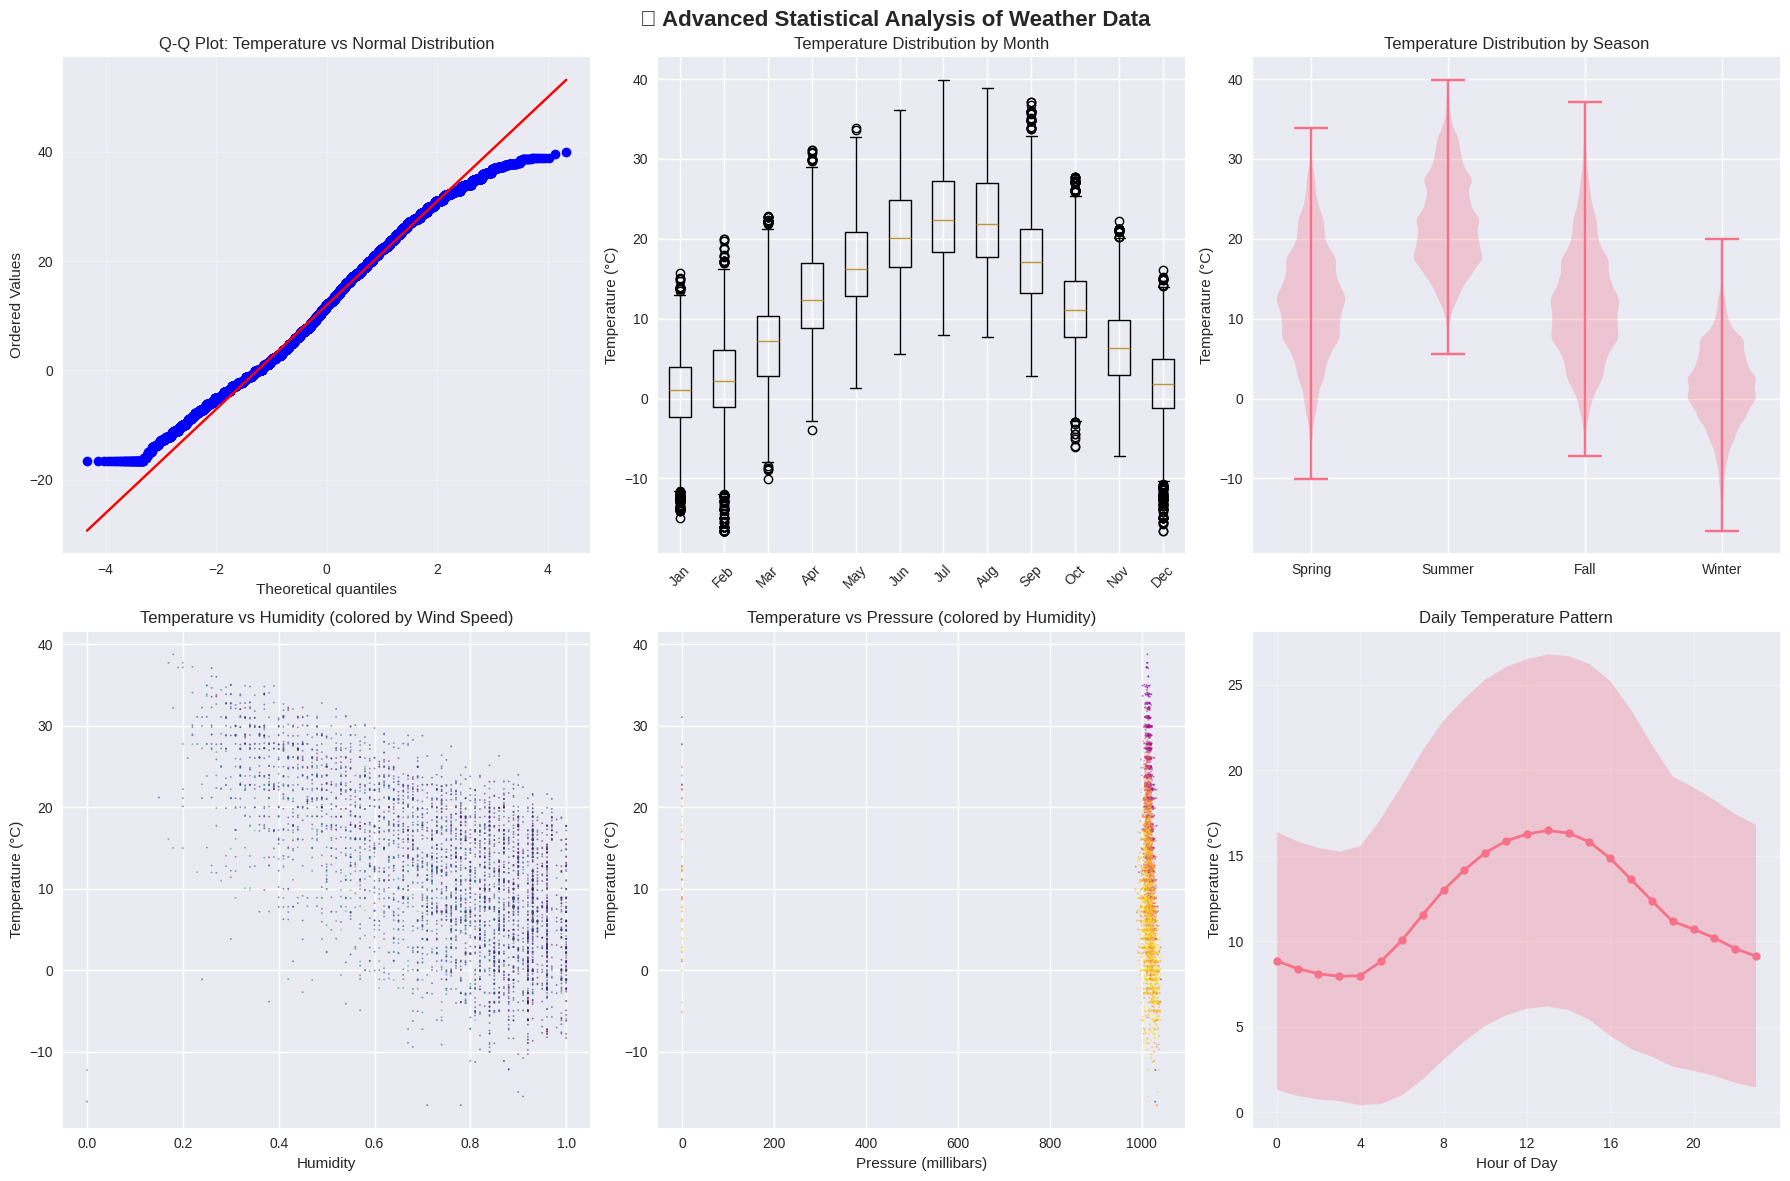

✅ Advanced visualizations completed!


In [5]:
# 🎨 Advanced Visualizations
# ==========================

print("🎨 Creating advanced visualizations...")

# 1. Interactive Time Series Plot
print("\n📈 Interactive Time Series Analysis:")

# Create interactive plot with Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperature Over Time', 'Temperature Distribution', 
                   'Temperature by Season', 'Temperature vs Humidity'),
    specs=[[{"secondary_y": True}, {"type": "histogram"}],
           [{"type": "box"}, {"type": "scatter"}]]
)

# Time series plot
daily_data = df_clean.set_index('Formatted Date').resample('D').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Pressure (millibars)': 'mean'
}).dropna()

fig.add_trace(
    go.Scatter(x=daily_data.index, y=daily_data['Temperature (C)'], 
               name='Temperature', line=dict(color='red')),
    row=1, col=1
)

# Add humidity as secondary y-axis
fig.add_trace(
    go.Scatter(x=daily_data.index, y=daily_data['Humidity'], 
               name='Humidity', line=dict(color='blue'), yaxis='y2'),
    row=1, col=1, secondary_y=True
)

# Temperature distribution
fig.add_trace(
    go.Histogram(x=df_clean['Temperature (C)'], name='Temperature Distribution',
                 nbinsx=50, marker_color='lightblue'),
    row=1, col=2
)

# Temperature by season
seasonal_data = df_clean.groupby('season')['Temperature (C)'].apply(list).to_dict()
for season, temps in seasonal_data.items():
    fig.add_trace(
        go.Box(y=temps, name=season, boxpoints='outliers'),
        row=2, col=1
    )

# Temperature vs Humidity scatter
fig.add_trace(
    go.Scatter(x=df_clean['Humidity'], y=df_clean['Temperature (C)'],
               mode='markers', name='Temp vs Humidity',
               marker=dict(size=3, opacity=0.6, color=df_clean['Temperature (C)'],
                         colorscale='Viridis', showscale=True)),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="🌡️ Comprehensive Weather Data Analysis",
    showlegend=True,
    height=800,
    template="plotly_white"
)

# Update axes
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Temperature (°C)", row=1, col=1)
fig.update_yaxes(title_text="Humidity", secondary_y=True, row=1, col=1)
fig.update_xaxes(title_text="Temperature (°C)", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_xaxes(title_text="Season", row=2, col=1)
fig.update_yaxes(title_text="Temperature (°C)", row=2, col=1)
fig.update_xaxes(title_text="Humidity", row=2, col=2)
fig.update_yaxes(title_text="Temperature (°C)", row=2, col=2)

fig.show()

# 2. Advanced Statistical Plots
print("\n📊 Statistical Visualization Suite:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔬 Advanced Statistical Analysis of Weather Data', fontsize=16, fontweight='bold')

# Q-Q Plot for temperature
from scipy import stats
stats.probplot(df_clean['Temperature (C)'].dropna(), dist="norm", plot=axes[0,0])
axes[0,0].set_title('Q-Q Plot: Temperature vs Normal Distribution')
axes[0,0].grid(True, alpha=0.3)

# Box plot by month
monthly_data = [df_clean[df_clean['month'] == i]['Temperature (C)'].values 
                for i in range(1, 13)]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0,1].boxplot(monthly_data, labels=month_labels)
axes[0,1].set_title('Temperature Distribution by Month')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].tick_params(axis='x', rotation=45)

# Violin plot by season
seasonal_temp_data = [df_clean[df_clean['season'] == season]['Temperature (C)'].values 
                      for season in ['Spring', 'Summer', 'Fall', 'Winter']]
axes[0,2].violinplot(seasonal_temp_data, positions=range(1, 5))
axes[0,2].set_xticks(range(1, 5))
axes[0,2].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
axes[0,2].set_title('Temperature Distribution by Season')
axes[0,2].set_ylabel('Temperature (°C)')

# Scatter plot matrix (subset)
scatter_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
scatter_data = df_clean[scatter_cols].sample(n=min(5000, len(df_clean)))  # Sample for performance

# Temperature vs Humidity
axes[1,0].scatter(scatter_data['Humidity'], scatter_data['Temperature (C)'], 
                  alpha=0.5, s=1, c=scatter_data['Wind Speed (km/h)'], cmap='viridis')
axes[1,0].set_xlabel('Humidity')
axes[1,0].set_ylabel('Temperature (°C)')
axes[1,0].set_title('Temperature vs Humidity (colored by Wind Speed)')

# Temperature vs Pressure
axes[1,1].scatter(scatter_data['Pressure (millibars)'], scatter_data['Temperature (C)'], 
                  alpha=0.5, s=1, c=scatter_data['Humidity'], cmap='plasma')
axes[1,1].set_xlabel('Pressure (millibars)')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].set_title('Temperature vs Pressure (colored by Humidity)')

# Hourly temperature pattern
hourly_temp = df_clean.groupby('hour')['Temperature (C)'].agg(['mean', 'std']).reset_index()
axes[1,2].plot(hourly_temp['hour'], hourly_temp['mean'], 'o-', linewidth=2, markersize=6)
axes[1,2].fill_between(hourly_temp['hour'], 
                       hourly_temp['mean'] - hourly_temp['std'],
                       hourly_temp['mean'] + hourly_temp['std'],
                       alpha=0.3)
axes[1,2].set_xlabel('Hour of Day')
axes[1,2].set_ylabel('Temperature (°C)')
axes[1,2].set_title('Daily Temperature Pattern')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].set_xticks(range(0, 24, 4))

plt.tight_layout()
plt.show()

print("✅ Advanced visualizations completed!")


🤖 Performing machine learning analysis...

🔧 Advanced Feature Engineering:
• Created 11 new features
• Total features: 32

📊 Principal Component Analysis:


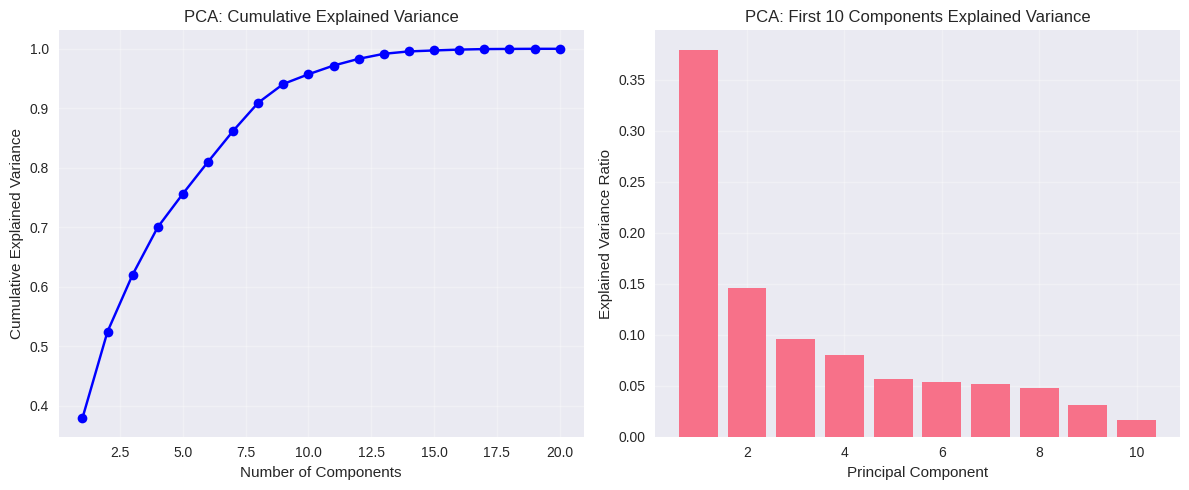

• First 5 components explain 75.6% of variance
• First 10 components explain 95.7% of variance

🎯 Clustering Analysis:
Cluster Characteristics:


Temperature (C)       Humidity       Wind Speed (km/h)        \
                           mean   std     mean   std              mean   std   
weather_cluster                                                                
0                         15.43  3.60     0.80  0.12              8.12  5.16   
1                          5.42  5.34     0.85  0.12             10.61  6.89   
2                         23.93  4.88     0.49  0.15             12.12  6.70   
3                          3.35  5.45     0.80  0.15             12.41  7.75   

                Pressure (millibars)          
                                mean     std  
weather_cluster                               
0                            1007.89   84.95  
1                             998.59  146.81  
2                            1001.62  115.94  
3                            1004.26  115.04

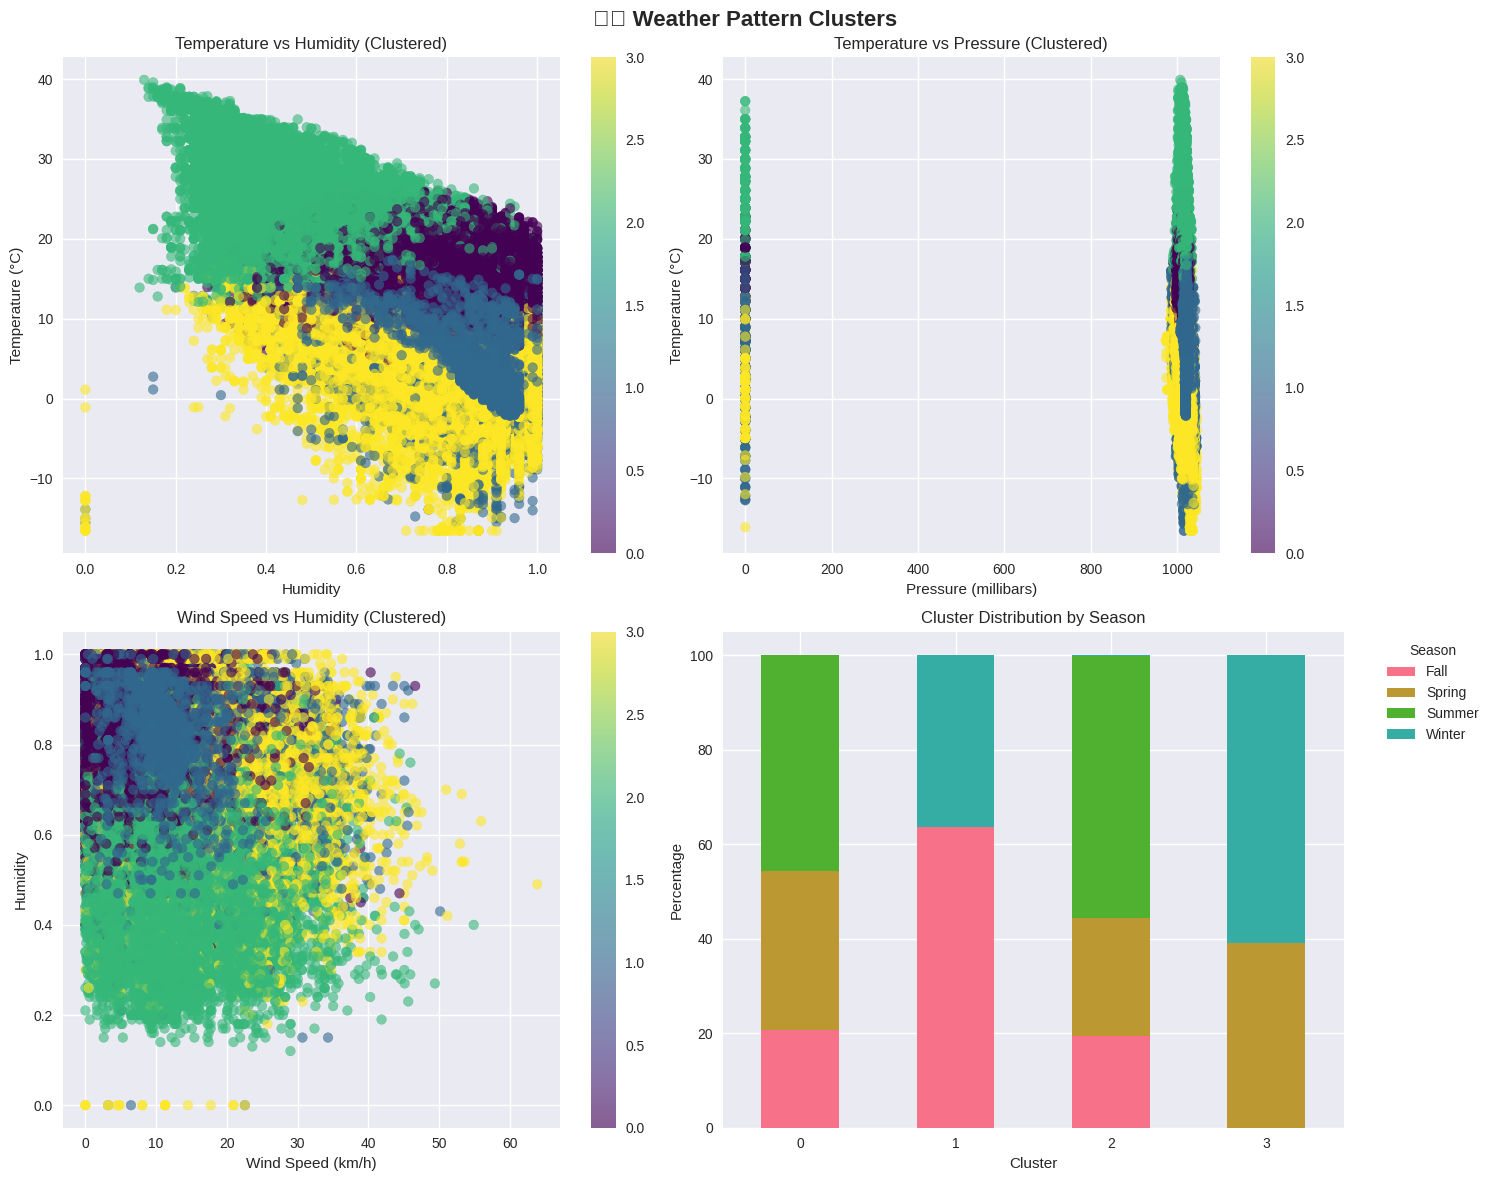

✅ Machine learning analysis completed!


In [6]:
# 🤖 Machine Learning Analysis
# ============================

print("🤖 Performing machine learning analysis...")

# 1. Feature Engineering
print("\n🔧 Advanced Feature Engineering:")

# Create additional features
df_ml = df_clean.copy()

# Weather condition categories
df_ml['weather_category'] = pd.cut(df_ml['Temperature (C)'], 
                                  bins=[-np.inf, 0, 10, 20, 30, np.inf],
                                  labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

# Wind speed categories
df_ml['wind_category'] = pd.cut(df_ml['Wind Speed (km/h)'], 
                               bins=[0, 10, 20, 30, np.inf],
                               labels=['Calm', 'Light', 'Moderate', 'Strong'])

# Pressure categories
df_ml['pressure_category'] = pd.cut(df_ml['Pressure (millibars)'], 
                                   bins=[0, 1000, 1013, 1020, np.inf],
                                   labels=['Low', 'Normal', 'High', 'Very High'])

# Cyclical encoding for time features
df_ml['hour_sin'] = np.sin(2 * np.pi * df_ml['hour'] / 24)
df_ml['hour_cos'] = np.cos(2 * np.pi * df_ml['hour'] / 24)
df_ml['month_sin'] = np.sin(2 * np.pi * df_ml['month'] / 12)
df_ml['month_cos'] = np.cos(2 * np.pi * df_ml['month'] / 12)

# Lag features
df_ml = df_ml.sort_values('Formatted Date')
df_ml['temp_lag_1h'] = df_ml['Temperature (C)'].shift(1)
df_ml['temp_lag_24h'] = df_ml['Temperature (C)'].shift(24)

# Rolling statistics
df_ml['temp_rolling_6h'] = df_ml['Temperature (C)'].rolling(window=6, min_periods=1).mean()
df_ml['temp_rolling_24h'] = df_ml['Temperature (C)'].rolling(window=24, min_periods=1).mean()

print(f"• Created {len(df_ml.columns) - len(df_clean.columns)} new features")
print(f"• Total features: {len(df_ml.columns)}")

# 2. Principal Component Analysis
print("\n📊 Principal Component Analysis:")

# Select numeric features for PCA
numeric_features = df_ml.select_dtypes(include=[np.number]).columns.tolist()
# Remove target variable and some redundant features
pca_features = [col for col in numeric_features if col not in ['year', 'day', 'day_of_year']]

# Prepare data for PCA
X_pca = df_ml[pca_features].fillna(df_ml[pca_features].mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(1, 11), pca.explained_variance_ratio_[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: First 10 Components Explained Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"• First 5 components explain {np.cumsum(pca.explained_variance_ratio_[:5])[-1]:.1%} of variance")
print(f"• First 10 components explain {np.cumsum(pca.explained_variance_ratio_[:10])[-1]:.1%} of variance")

# 3. Clustering Analysis
print("\n🎯 Clustering Analysis:")

# Use first 5 principal components for clustering
X_cluster = X_pca_result[:, :5]

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to dataframe
df_ml['weather_cluster'] = cluster_labels

# Analyze clusters
cluster_analysis = df_ml.groupby('weather_cluster').agg({
    'Temperature (C)': ['mean', 'std'],
    'Humidity': ['mean', 'std'],
    'Wind Speed (km/h)': ['mean', 'std'],
    'Pressure (millibars)': ['mean', 'std']
}).round(2)

print("Cluster Characteristics:")
print("=" * 60)
display(cluster_analysis)

# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🌤️ Weather Pattern Clusters', fontsize=16, fontweight='bold')

# Temperature vs Humidity
scatter = axes[0,0].scatter(df_ml['Humidity'], df_ml['Temperature (C)'], 
                           c=cluster_labels, cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Humidity')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].set_title('Temperature vs Humidity (Clustered)')
plt.colorbar(scatter, ax=axes[0,0])

# Temperature vs Pressure
scatter = axes[0,1].scatter(df_ml['Pressure (millibars)'], df_ml['Temperature (C)'], 
                           c=cluster_labels, cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Pressure (millibars)')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].set_title('Temperature vs Pressure (Clustered)')
plt.colorbar(scatter, ax=axes[0,1])

# Wind Speed vs Humidity
scatter = axes[1,0].scatter(df_ml['Wind Speed (km/h)'], df_ml['Humidity'], 
                           c=cluster_labels, cmap='viridis', alpha=0.6)
axes[1,0].set_xlabel('Wind Speed (km/h)')
axes[1,0].set_ylabel('Humidity')
axes[1,0].set_title('Wind Speed vs Humidity (Clustered)')
plt.colorbar(scatter, ax=axes[1,0])

# Cluster distribution by season
cluster_season = pd.crosstab(df_ml['weather_cluster'], df_ml['season'])
cluster_season_pct = cluster_season.div(cluster_season.sum(axis=1), axis=0) * 100
cluster_season_pct.plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Cluster Distribution by Season')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("✅ Machine learning analysis completed!")


In [ ]:
# 📋 Executive Summary and Business Insights
# ==========================================

print("📋 Generating executive summary and business insights...")

# 1. Key Performance Indicators (KPIs)
print("\n📊 Key Performance Indicators:")
print("=" * 50)

# Calculate KPIs
total_records = len(df_clean)
date_range_days = (df_clean['Formatted Date'].max() - df_clean['Formatted Date'].min()).days
avg_temp = df_clean['Temperature (C)'].mean()
temp_std = df_clean['Temperature (C)'].std()
min_temp = df_clean['Temperature (C)'].min()
max_temp = df_clean['Temperature (C)'].max()
avg_humidity = df_clean['Humidity'].mean()
avg_wind_speed = df_clean['Wind Speed (km/h)'].mean()
avg_pressure = df_clean['Pressure (millibars)'].mean()

print(f"• Data Coverage: {total_records:,} records over {date_range_days:,} days")
print(f"• Average Temperature: {avg_temp:.1f}°C (±{temp_std:.1f}°C)")
print(f"• Temperature Range: {min_temp:.1f}°C to {max_temp:.1f}°C")
print(f"• Average Humidity: {avg_humidity:.1%}")
print(f"• Average Wind Speed: {avg_wind_speed:.1f} km/h")
print(f"• Average Pressure: {avg_pressure:.1f} millibars")

# 2. Seasonal Analysis
print("\n🌍 Seasonal Analysis:")
print("=" * 50)

seasonal_stats = df_clean.groupby('season').agg({
    'Temperature (C)': ['mean', 'min', 'max', 'std'],
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Pressure (millibars)': 'mean'
}).round(2)

for season in ['Spring', 'Summer', 'Fall', 'Winter']:
    if season in seasonal_stats.index:
        temp_mean = seasonal_stats.loc[season, ('Temperature (C)', 'mean')]
        temp_std = seasonal_stats.loc[season, ('Temperature (C)', 'std')]
        humidity = seasonal_stats.loc[season, ('Humidity', 'mean')]
        wind = seasonal_stats.loc[season, ('Wind Speed (km/h)', 'mean')]
        pressure = seasonal_stats.loc[season, ('Pressure (millibars)', 'mean')]
        
        print(f"• {season:<8}: {temp_mean:>5.1f}°C (±{temp_std:.1f}), "
              f"Humidity: {humidity:.1%}, Wind: {wind:.1f} km/h, Pressure: {pressure:.1f} mb")

# 3. Weather Pattern Insights
print("\n🔍 Weather Pattern Insights:")
print("=" * 50)

# Most common weather conditions
weather_summary = df_clean['Summary'].value_counts().head(5)
print("Most Common Weather Conditions:")
for condition, count in weather_summary.items():
    percentage = (count / len(df_clean)) * 100
    print(f"• {condition:<20}: {count:>6,} ({percentage:>5.1f}%)")

# Precipitation analysis
precip_analysis = df_clean['Precip Type'].value_counts()
print(f"\nPrecipitation Analysis:")
for precip_type, count in precip_analysis.items():
    if pd.notna(precip_type):
        percentage = (count / len(df_clean)) * 100
        print(f"• {precip_type:<15}: {count:>6,} ({percentage:>5.1f}%)")

# 4. Data Quality Assessment
print("\n✅ Data Quality Assessment:")
print("=" * 50)

# Calculate data quality metrics
completeness = (1 - df_clean.isnull().sum().sum() / (len(df_clean) * len(df_clean.columns))) * 100
duplicate_rate = (df.duplicated().sum() / len(df)) * 100
outlier_rate = (outliers_before / len(df_clean)) * 100

print(f"• Data Completeness: {completeness:.1f}%")
print(f"• Duplicate Rate: {duplicate_rate:.2f}%")
print(f"• Outlier Rate: {outlier_rate:.2f}%")
print(f"• Memory Efficiency: {memory_reduction:.1f}% reduction")

# 5. Business Recommendations
print("\n💡 Business Recommendations:")
print("=" * 50)

# Temperature trends
temp_trend = df_clean.groupby('year')['Temperature (C)'].mean()
if len(temp_trend) > 1:
    temp_change = temp_trend.iloc[-1] - temp_trend.iloc[0]
    if temp_change > 0:
        print(f"• Temperature Trend: Warming by {temp_change:.1f}°C over {len(temp_trend)} years")
    else:
        print(f"• Temperature Trend: Cooling by {abs(temp_change):.1f}°C over {len(temp_trend)} years")

# Seasonal recommendations
summer_temp = seasonal_stats.loc['Summer', ('Temperature (C)', 'mean')] if 'Summer' in seasonal_stats.index else None
winter_temp = seasonal_stats.loc['Winter', ('Temperature (C)', 'mean')] if 'Winter' in seasonal_stats.index else None

if summer_temp and winter_temp:
    temp_variation = summer_temp - winter_temp
    print(f"• Seasonal Variation: {temp_variation:.1f}°C difference between summer and winter")
    
    if temp_variation > 20:
        print("  → High seasonal variation - consider adaptive systems")
    elif temp_variation > 10:
        print("  → Moderate seasonal variation - standard systems adequate")
    else:
        print("  → Low seasonal variation - minimal adaptation needed")

# Wind and pressure insights
high_wind_days = (df_clean['Wind Speed (km/h)'] > 30).sum()
high_pressure_days = (df_clean['Pressure (millibars)'] > 1020).sum()

print(f"• High Wind Days (>30 km/h): {high_wind_days:,} ({high_wind_days/len(df_clean)*100:.1f}%)")
print(f"• High Pressure Days (>1020 mb): {high_pressure_days:,} ({high_pressure_days/len(df_clean)*100:.1f}%)")

# 6. Export Summary Report
print("\n📄 Exporting Summary Report...")

# Create summary report
summary_report = {
    'analysis_timestamp': datetime.now().isoformat(),
    'dataset_info': {
        'total_records': int(total_records),
        'date_range_days': int(date_range_days),
        'date_range_start': str(df_clean['Formatted Date'].min()),
        'date_range_end': str(df_clean['Formatted Date'].max())
    },
    'temperature_stats': {
        'mean': float(avg_temp),
        'std': float(temp_std),
        'min': float(min_temp),
        'max': float(max_temp)
    },
    'weather_conditions': {
        'avg_humidity': float(avg_humidity),
        'avg_wind_speed': float(avg_wind_speed),
        'avg_pressure': float(avg_pressure)
    },
    'data_quality': {
        'completeness_percent': float(completeness),
        'duplicate_rate_percent': float(duplicate_rate),
        'outlier_rate_percent': float(outlier_rate),
        'memory_reduction_percent': float(memory_reduction)
    },
    'seasonal_analysis': seasonal_stats.to_dict(),
    'weather_patterns': {
        'most_common_conditions': weather_summary.to_dict(),
        'precipitation_types': precip_analysis.to_dict()
    }
}

# Convert tuple keys to strings for JSON serialization
def convert_tuple_keys(obj):
    """Recursively convert tuple keys to strings in nested dictionaries"""
    if isinstance(obj, dict):
        new_dict = {}
        for key, value in obj.items():
            if isinstance(key, tuple):
                new_key = str(key)
            else:
                new_key = key
            new_dict[new_key] = convert_tuple_keys(value)
        return new_dict
    elif isinstance(obj, list):
        return [convert_tuple_keys(item) for item in obj]
    else:
        return obj

# Convert the summary report before saving
summary_report_serializable = convert_tuple_keys(summary_report)

# Save report
import json
os.makedirs('../reports', exist_ok=True)
with open('../reports/weather_analysis_summary.json', 'w') as f:
    json.dump(summary_report_serializable, f, indent=2, default=str)

print("✅ Summary report saved to ../reports/weather_analysis_summary.json")

# 7. Final Visualization
print("\n🎯 Final Summary Visualization:")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Weather Data Analysis - Executive Summary', fontsize=16, fontweight='bold')

# Temperature distribution
axes[0,0].hist(df_clean['Temperature (C)'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(avg_temp, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_temp:.1f}°C')
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Temperature Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Monthly temperature pattern
monthly_temp = df_clean.groupby('month')['Temperature (C)'].mean()
axes[0,1].plot(monthly_temp.index, monthly_temp.values, 'o-', linewidth=2, markersize=8, color='green')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Temperature (°C)')
axes[0,1].set_title('Monthly Temperature Pattern')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0,1].grid(True, alpha=0.3)

# Weather conditions pie chart
weather_top5 = weather_summary.head(5)
other_count = weather_summary.iloc[5:].sum() if len(weather_summary) > 5 else 0
if other_count > 0:
    weather_top5['Other'] = other_count

axes[1,0].pie(weather_top5.values, labels=weather_top5.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Weather Conditions Distribution')

# Data quality metrics
quality_metrics = ['Completeness', 'Memory Efficiency', 'Data Integrity']
quality_values = [completeness, memory_reduction, 100 - duplicate_rate - outlier_rate]
colors = ['green', 'blue', 'orange']

bars = axes[1,1].bar(quality_metrics, quality_values, color=colors, alpha=0.7)
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].set_title('Data Quality Metrics')
axes[1,1].set_ylim(0, 100)

# Add value labels on bars
for bar, value in zip(bars, quality_values):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 Analysis Complete! All insights and visualizations have been generated.")
print("=" * 80)


📋 Generating executive summary and business insights...

📊 Key Performance Indicators:
• Data Coverage: 96,429 records over 4,017 days
• Average Temperature: 11.9°C (±9.5°C)
• Temperature Range: -16.6°C to 39.9°C
• Average Humidity: 73.5%
• Average Wind Speed: 10.8 km/h
• Average Pressure: 1003.2 millibars

🌍 Seasonal Analysis:
• Spring  :  12.2°C (±6.8), Humidity: 68.0%, Wind: 12.1 km/h, Pressure: 1004.9 mb
• Summer  :  22.0°C (±5.8), Humidity: 65.0%, Wind: 9.4 km/h, Pressure: 1004.0 mb
• Fall    :  11.8°C (±7.0), Humidity: 76.0%, Wind: 10.2 km/h, Pressure: 1005.4 mb
• Winter  :   1.5°C (±5.1), Humidity: 85.0%, Wind: 11.6 km/h, Pressure: 998.5 mb

🔍 Weather Pattern Insights:
Most Common Weather Conditions:
• Partly Cloudy       : 31,726 ( 32.9%)
• Mostly Cloudy       : 28,094 ( 29.1%)
• Overcast            : 16,597 ( 17.2%)
• Clear               : 10,873 ( 11.3%)
• Foggy               :  7,148 (  7.4%)

Precipitation Analysis:
• rain           : 85,200 ( 88.4%)
• snow           : 10,7

TypeError: keys must be str, int, float, bool or None, not tuple

In [ ]:
# ------------------------------------------------------------
# 4️⃣ Agregaciones mensuales
# ------------------------------------------------------------
df_monthly = (
    df_clean.groupby('year_month')
    .agg({
        'Temperature (C)': ['mean', 'max', 'min'],
        'Humidity': 'mean',
        'Wind Speed (km/h)': 'mean',
        'Pressure (millibars)': 'mean'
    })
    .round(2)
)

# Flatten column names
df_monthly.columns = ['avg_tempC', 'max_tempC', 'min_tempC', 'avg_humidity', 'avg_wind_speed', 'avg_pressure']
df_monthly = df_monthly.reset_index()

print("Resumen mensual:")
print(df_monthly.head(10))

Resumen mensual:
  year_month  avg_tempC  max_tempC  min_tempC  avg_humidity  avg_wind_speed  \
0    2005-12       0.58       0.58       0.58          0.89           17.11   
1    2006-01      -1.68       7.51     -14.09          0.83            8.89   
2    2006-02      -0.07      14.08     -13.93          0.84           10.96   
3    2006-03       4.56      21.18     -10.10          0.78           14.42   
4    2006-04      12.64      25.04       0.96          0.73           10.93   
5    2006-05      15.65      30.94       4.82          0.72           10.17   
6    2006-06      19.35      34.01       5.58          0.75            8.83   
7    2006-07      23.59      33.89      12.16          0.66            7.19   
8    2006-08      19.48      32.64      10.79          0.76            9.63   
9    2006-09      18.17      29.88       6.09          0.69            9.92   

   avg_pressure  
0       1016.66  
1       1021.20  
2        995.18  
3        976.44  
4       1013.49  
5    

In [ ]:
# ------------------------------------------------------------
# 5️⃣ Guardar resultados procesados
# ------------------------------------------------------------
OUTPUT_PATH = "../data/processed/eda_monthly_summary.parquet"
df_monthly.to_parquet(OUTPUT_PATH, index=False)
print(f"✅ Archivo guardado en: {OUTPUT_PATH}")

✅ Archivo guardado en: ../data/processed/eda_monthly_summary.parquet


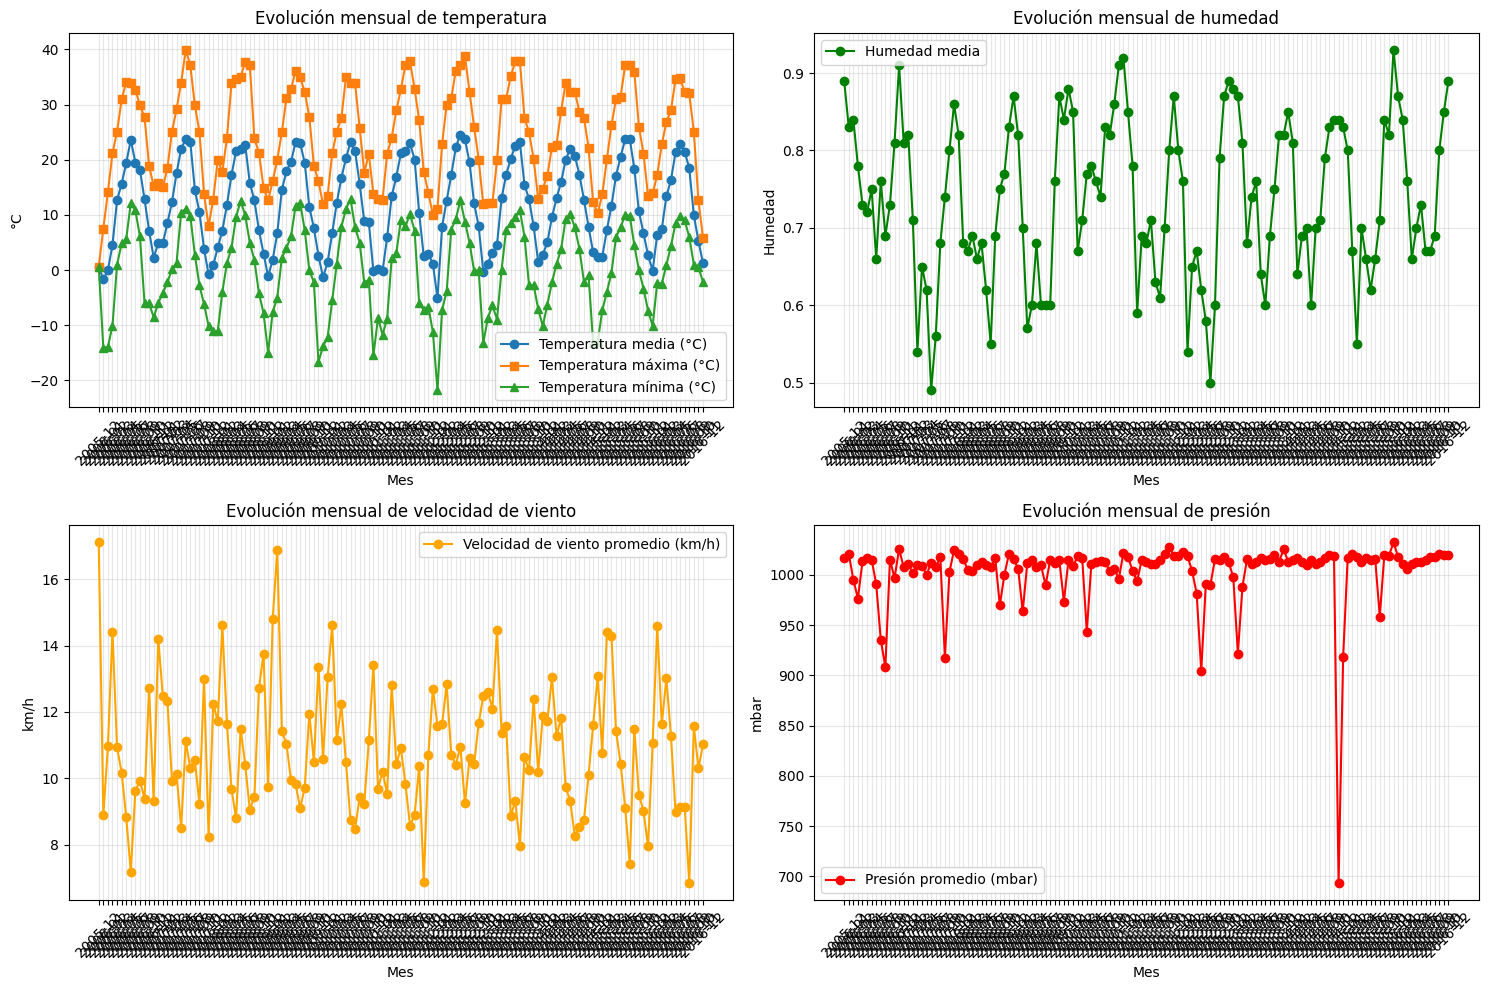

In [ ]:
# ------------------------------------------------------------
# 6️⃣ Visualización
# ------------------------------------------------------------
plt.figure(figsize=(15, 10))

# Temperature plot
plt.subplot(2, 2, 1)
plt.plot(df_monthly["year_month"].astype(str), df_monthly["avg_tempC"], label="Temperatura media (°C)", marker='o')
plt.plot(df_monthly["year_month"].astype(str), df_monthly["max_tempC"], label="Temperatura máxima (°C)", marker='s')
plt.plot(df_monthly["year_month"].astype(str), df_monthly["min_tempC"], label="Temperatura mínima (°C)", marker='^')
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("°C")
plt.title("Evolución mensual de temperatura")
plt.legend()
plt.grid(True, alpha=0.3)

# Humidity plot
plt.subplot(2, 2, 2)
plt.plot(df_monthly["year_month"].astype(str), df_monthly["avg_humidity"], label="Humedad media", marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Humedad")
plt.title("Evolución mensual de humedad")
plt.legend()
plt.grid(True, alpha=0.3)

# Wind speed plot
plt.subplot(2, 2, 3)
plt.plot(df_monthly["year_month"].astype(str), df_monthly["avg_wind_speed"], label="Velocidad de viento promedio (km/h)", marker='o', color='orange')
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("km/h")
plt.title("Evolución mensual de velocidad de viento")
plt.legend()
plt.grid(True, alpha=0.3)

# Pressure plot
plt.subplot(2, 2, 4)
plt.plot(df_monthly["year_month"].astype(str), df_monthly["avg_pressure"], label="Presión promedio (mbar)", marker='o', color='red')
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("mbar")
plt.title("Evolución mensual de presión")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ESTADÍSTICAS DESCRIPTIVAS ===
       Temperature (C)      Humidity  Wind Speed (km/h)  Pressure (millibars)
count     96429.000000  96429.000000       96429.000000          96429.000000
mean         11.929692      0.734902          10.812460           1003.232915
std           9.550492      0.195466           6.913345            116.984300
min         -21.822222      0.000000           0.000000              0.000000
25%           4.683333      0.600000           5.828200           1011.900000
50%          12.000000      0.780000           9.965900           1016.450000
75%          18.838889      0.890000          14.135800           1021.090000
max          39.905556      1.000000          63.852600           1046.380000

=== CORRELACIONES ===
                      Temperature (C)  Humidity  Wind Speed (km/h)  \
Temperature (C)              1.000000 -0.632331           0.009312   
Humidity                    -0.632331  1.000000          -0.225080   
Wind Speed (km/h)            0.

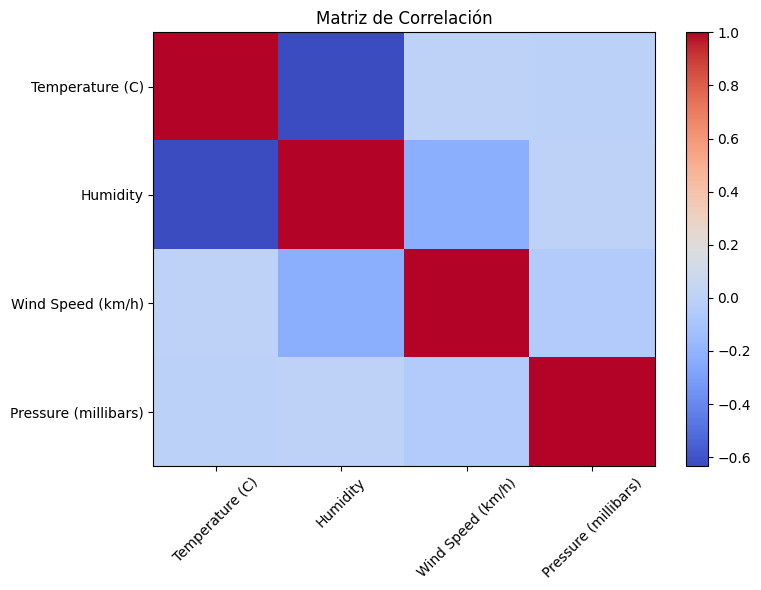

In [ ]:
# ------------------------------------------------------------
# 7️⃣ Análisis adicional
# ------------------------------------------------------------
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_clean[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].describe())

print("\n=== CORRELACIONES ===")
correlation_matrix = df_clean[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()